In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-white')

In [256]:
def plot_histogram(dataset, sep=" "):
    data = pd.read_csv(dataset + '/out_community.txt', sep=sep, skiprows=1, names=["Node", "Com"])
    data['Com'] = data['Com'].values.astype(str)
    data["Com"].replace({"0": "Blue", "1": "Red"}, inplace=True)
    rpgrank = pd.read_csv(dataset + "/red_absorbing_probabilities.csv", sep=",", skiprows=1, names=["Node", "RP"])
    result = rpgrank.join(data.set_index('Node'), on="Node")
    x1 = result.loc[result.Com=='Blue', 'RP']
    x2 = result.loc[result.Com=='Red', 'RP']
    kwargs = dict(alpha=0.5, bins=10)
    plt.hist(x1, **kwargs, color='darkblue', label='Blue', linewidth=0.5)
    plt.hist(x2, **kwargs, color='maroon', label='Red', linewidth=0.5)
    plt.xlim(0,1)
    plt.legend(fontsize=15)
    plt.legend(frameon=True)
    plt.xlabel('Red Ratio', fontsize=15)
    plt.ylabel('Count', fontsize=15)
#     plt.show()
    plt.savefig("figures/" + dataset + "_histogram.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


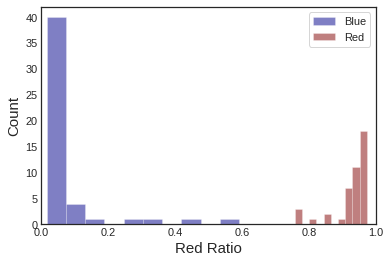

In [257]:
plot_histogram("books")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


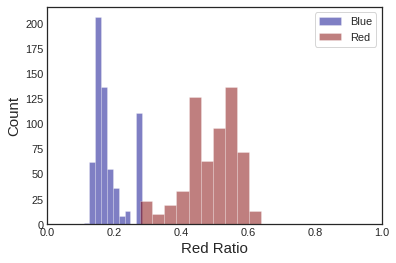

In [258]:
plot_histogram("blogs", sep="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


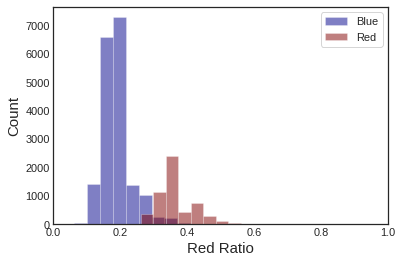

In [259]:
plot_histogram("dblp_new_pubs", sep="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


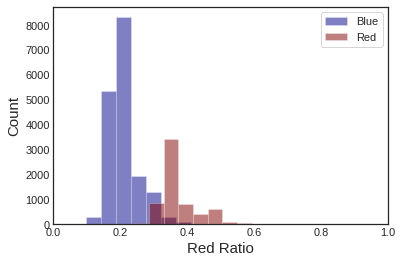

In [260]:
plot_histogram("dblp_new_gender", sep="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


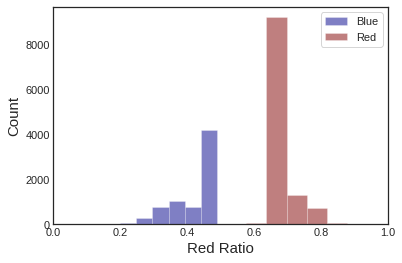

In [261]:
plot_histogram("twitter")

In [262]:
def plot_violin(dataset, separator=" ", our_algo=True):
    data = pd.read_csv(dataset + '/out_community.txt', sep=separator, skiprows=1, names=["Node", "Com"])
    data['Com'] = data['Com'].values.astype(str)
    data["Com"].replace({"0": "Blue", "1": "Red"}, inplace=True)
    frames = None
    if our_algo:
        df_fair = pd.read_csv(dataset + "/sc_personalized_fair.csv_round_9.csv" , sep="\t")
        df_efrec = pd.read_csv(dataset + "/sc_personalized_hybrid_node2vec.csv_round_9.csv" , sep="\t")
        df_prec = pd.read_csv(dataset + "/sc_personalized_dyadic_fair.csv_round_9.csv" , sep="\t")
        df_eprec = pd.read_csv(dataset + "/sc_personalized_hybrid_balanced_node2vec.csv_round_9.csv" , sep="\t")
        df_n2v = pd.read_csv(dataset + "/sc_personalized_node2vec.csv_round_9.csv" , sep="\t")
        df_fw = pd.read_csv(dataset + "/sc_personalized_fairwalk.csv_round_9.csv" , sep="\t")
        df_fair.insert(0, 'Algorithm', 'FREC')
        df_efrec.insert(0, 'Algorithm', 'E_FREC')
        df_prec.insert(0, 'Algorithm', 'PREC')
        df_eprec.insert(0, 'Algorithm', 'E_PREC')
        df_n2v.insert(0, 'Algorithm', 'n2v')
        df_fw.insert(0, 'Algorithm', 'FairWalk')
        frames = [df_fair, df_efrec, df_prec, df_eprec, df_n2v, df_fw]
    else:
        df_pref = pd.read_csv(dataset + "/sc_personalized_preferential_attachment.csv_round_9.csv" , sep="\t")
        df_jac = pd.read_csv(dataset + "/sc_personalized_jaccard_coefficient.csv_round_9.csv" , sep="\t")
        df_ad = pd.read_csv(dataset + "/sc_personalized_adamic_adar.csv_round_9.csv" , sep="\t")
        df_n2v = pd.read_csv(dataset + "/sc_personalized_node2vec.csv_round_9.csv" , sep="\t")
        df_r = pd.read_csv(dataset + "/sc_personalized_random.csv_round_9.csv" , sep="\t")
        df_pref.insert(0, 'Algorithm', 'PA')
        df_jac.insert(0, 'Algorithm', 'JC')
        df_ad.insert(0, 'Algorithm', 'ADA')
        df_n2v.insert(0, 'Algorithm', 'n2v')
        df_r.insert(0, 'Algorithm', 'Rnd')
        frames = [df_pref, df_jac, df_ad, df_n2v, df_r]
    for f in frames:
        f.rename(columns={"Red Personalized Pagerank": "Personalized Distribution"}, inplace=True)
    result = pd.concat(frames)
    result = result.join(data.set_index('Node'), on="Node")
    my_pal = {Com: "r" if Com == "Red" else "b" for Com in result["Com"].unique()}
    sns.violinplot(hue="Com", x='Algorithm', y="Personalized Distribution", 
                   palette=my_pal, split=True, data=result, linewidth=1, hue_order= ["Blue", "Red"])
    plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend('', frameon=False)
    plt.xlabel('Algorithm', fontsize=15)
    plt.ylabel('Personalized Distribution', fontsize=15)
#     plt.show()
    tmp = "_our_algo" if our_algo else "_rec"
    plt.savefig("figures/" + dataset + "_violin" + tmp + ".png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

def plot_violin_all_datasets(datasets, separator=" "):
    dfs = []
    names = {"blogs": "BLOGS", "twitter": "TWITTER", "dblp_new_gender": "DBLP_GENDER", "books": "BOOKS",
            "dblp_new_pubs": "DBLP_PUB"}
    for dataset in datasets:
        df = pd.read_csv(dataset + "/sc_personalized_fair.csv_round_-1.csv" , sep="\t")
        df.insert(0, 'Dataset', names[dataset])
        dfs.append(df)
    frames = dfs
    result = pd.concat(frames)
    try:
        while True:
            data = pd.read_csv(dataset + '/out_community.txt', sep=separator, skiprows=1, names=["Node", "Com"])
            data['Com'] = data['Com'].values.astype(str)
            data["Com"].replace({"0": "Blue", "1": "Red"}, inplace=True)
            result = result.join(data.set_index('Node'), on="Node")
            break
    except Exception:
        separator = "\t"
    my_pal = {Com: "r" if Com == "Red" else "b" for Com in result["Com"].unique()}
    plt.figure(figsize=(8,4)) # this creates a figure 8 inch wide, 4 inch high
    sns.violinplot(hue="Com", x='Dataset', y="Red Personalized Pagerank", 
                   palette=my_pal, split=True, data=result, linewidth=1, hue_order= ["Blue", "Red"])
    plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.show()

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


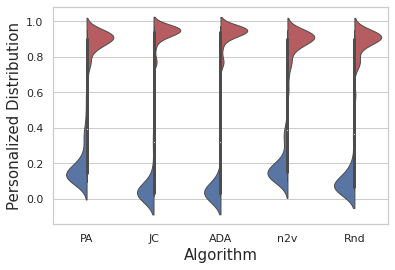

In [165]:
plot_violin("books", our_algo=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


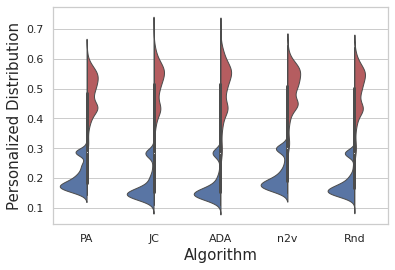

In [166]:
plot_violin("blogs", separator="\t", our_algo=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


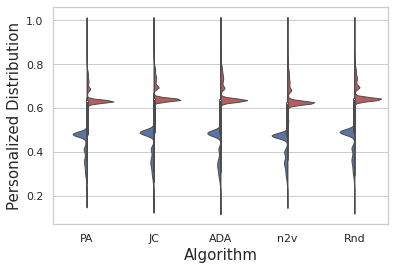

In [167]:
plot_violin("twitter", our_algo=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


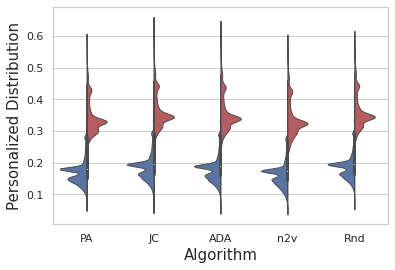

In [168]:
plot_violin("dblp_new_pubs", separator="\t", our_algo=False)

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


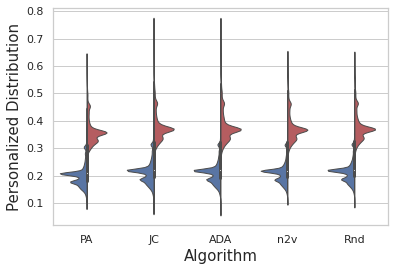

In [169]:
plot_violin("dblp_new_gender", separator="\t", our_algo=False)

## Our Algorithms

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


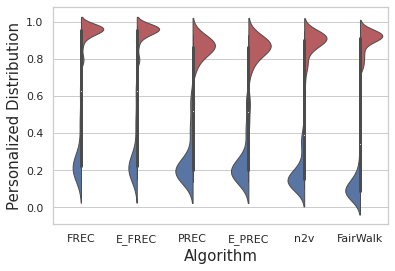

In [170]:
plot_violin("books")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


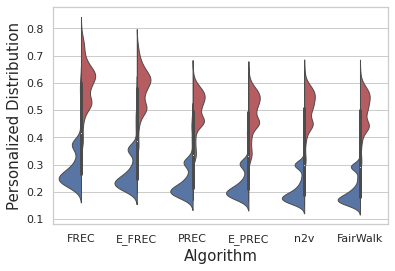

In [171]:
plot_violin("blogs", separator="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


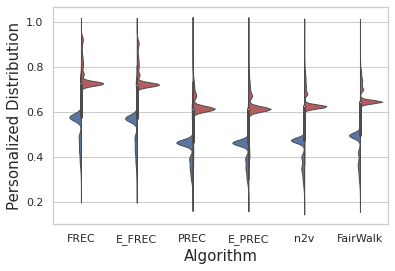

In [172]:
plot_violin("twitter")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


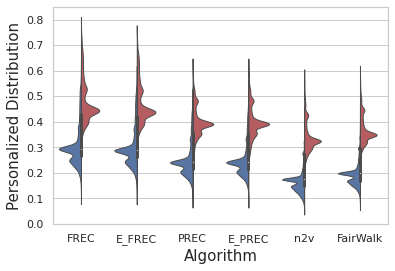

In [173]:
plot_violin("dblp_new_pubs", separator="\t")

/home/tsiou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


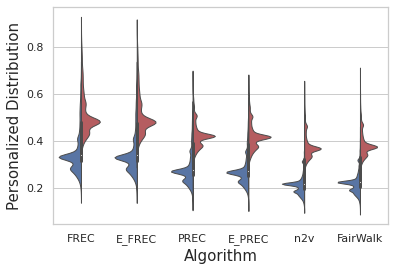

In [174]:
plot_violin("dblp_new_gender", separator="\t")

In [175]:
def plot_histogram(dataset):
    df = pd.read_csv(dataset + "/sc_personalized_fair.csv_round_-1.csv", sep="\t")
    df.hist(bins=3)

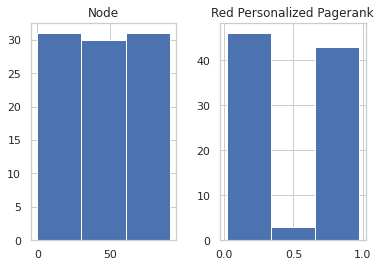

In [176]:
plot_histogram('books')